In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

C:\Users\priyavrat.sharma\AppData\Local\miniconda3\envs\learn\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv("LoanApprovalPrediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data = data.drop("Loan_ID",axis=1)

In [4]:
obj = (data.dtypes == 'object')
categorical_columns = list(obj[obj].index)

<function matplotlib.pyplot.show(close=None, block=None)>

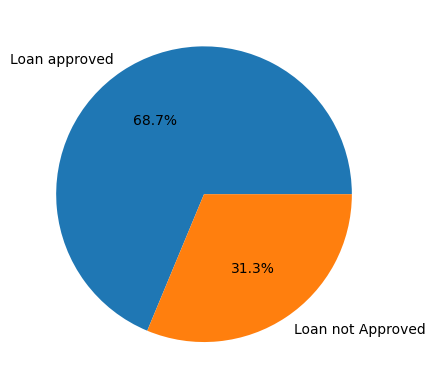

In [5]:
value_count = list(data['Loan_Status'].value_counts())
my_labels = ["Loan approved","Loan not Approved"]
plt.pie(value_count,labels= my_labels,autopct="%1.1f%%")
plt.show

In [6]:
for col in categorical_columns:
    data[col] = LabelEncoder().fit_transform(data[col])

data.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
for col in data.columns:
    data[col] = data[col].fillna(data[col].median())

data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

((598, 11), (598,))

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.4,random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

In [10]:
##Support Vector Classifier
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
print(metrics.classification_report(Y_test,Y_pred_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.69      0.99      0.82       167

    accuracy                           0.69       240
   macro avg       0.35      0.50      0.41       240
weighted avg       0.48      0.69      0.57       240



In [11]:
## Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
Y_pred_mnb = mnb.predict(X_test)
print(metrics.classification_report(Y_test,Y_pred_mnb))

              precision    recall  f1-score   support

           0       0.28      0.47      0.35        73
           1       0.68      0.49      0.56       167

    accuracy                           0.48       240
   macro avg       0.48      0.48      0.46       240
weighted avg       0.56      0.48      0.50       240



In [12]:
## Random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_pred_rfc = rfc.predict(X_test)
print(metrics.classification_report(Y_test,Y_pred_rfc))

              precision    recall  f1-score   support

           0       0.80      0.49      0.61        73
           1       0.81      0.95      0.87       167

    accuracy                           0.81       240
   macro avg       0.81      0.72      0.74       240
weighted avg       0.81      0.81      0.79       240

